# Exploratory Data Analysis

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('D:/Projects/Projects/Air quality Index/Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

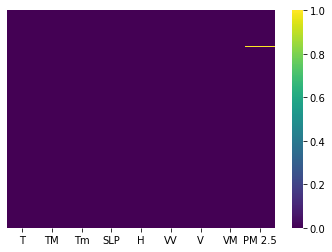

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [7]:
df=df.dropna()


In [8]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] 


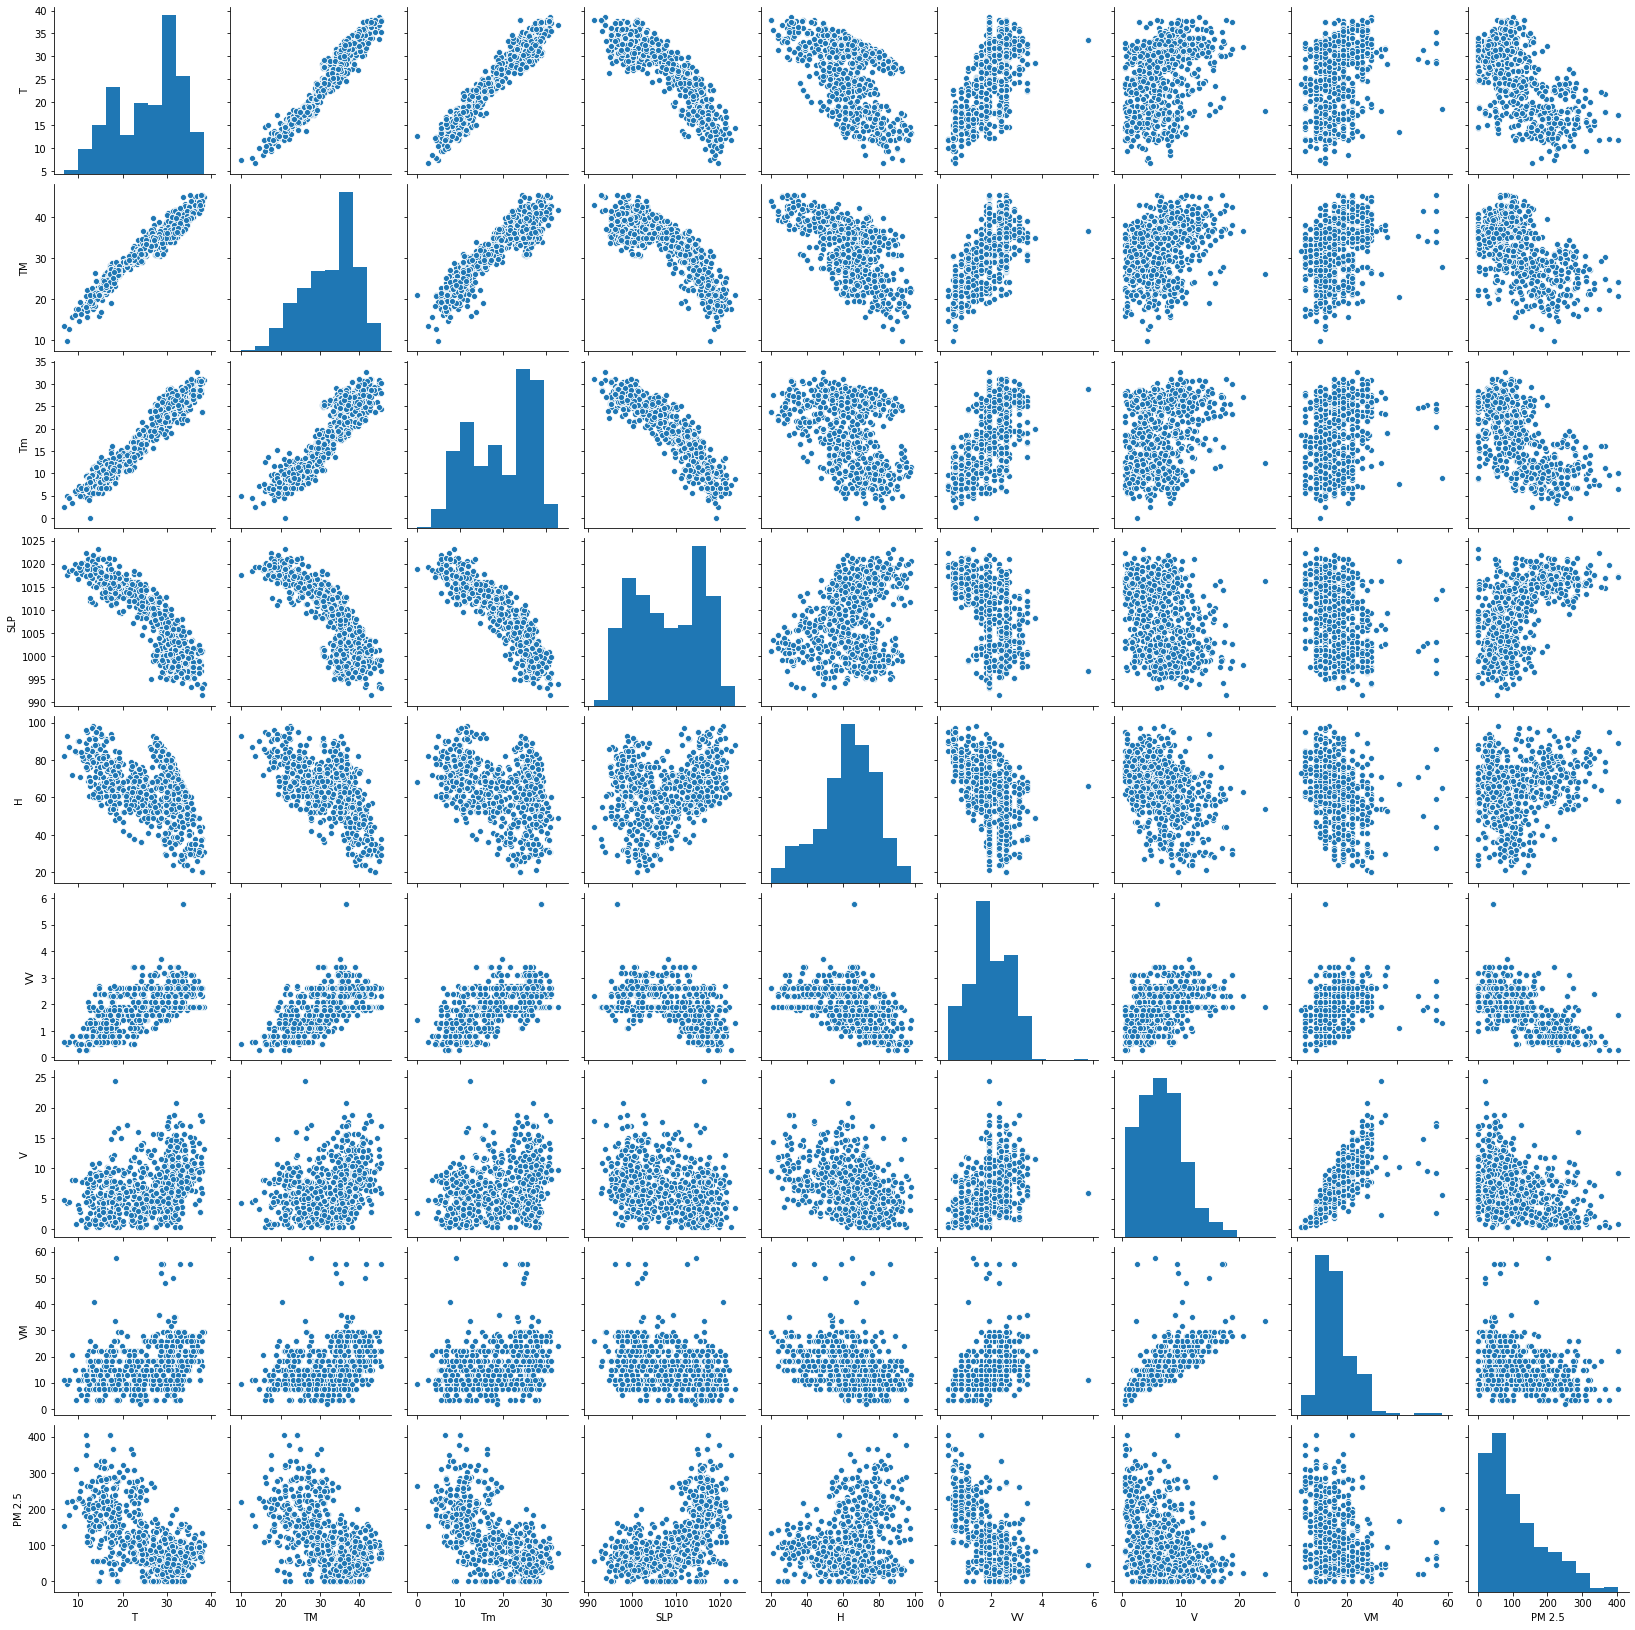

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


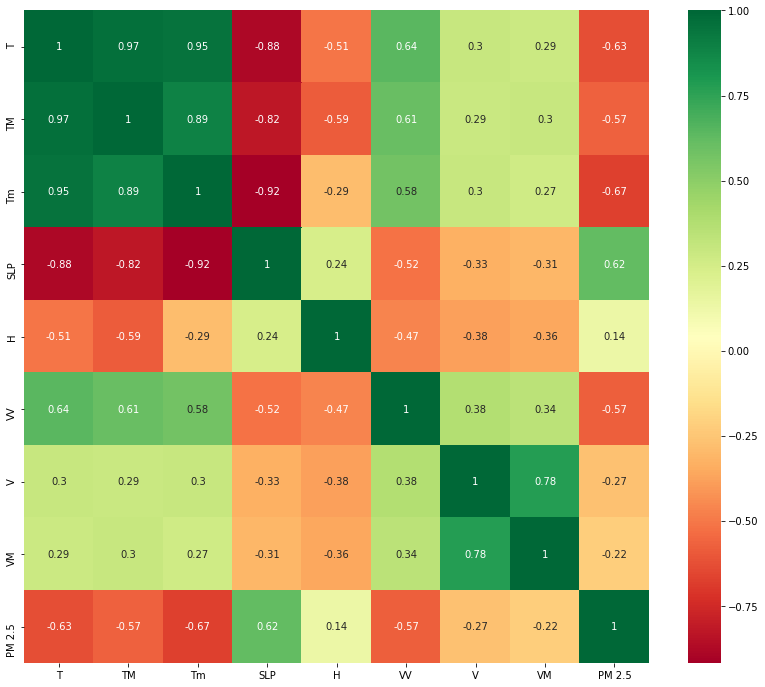

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [13]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [14]:
model.feature_importances_


array([0.18424426, 0.1144127 , 0.17425864, 0.15014162, 0.09091664,
       0.18729104, 0.05410091, 0.04463419])

In [15]:
X.head(2) #eg T=0.14 Tm= 0.08 

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1


In [16]:
fea_imp=pd.Series(model.feature_importances_,index=X.columns)
fea_imp

T      0.184244
TM     0.114413
Tm     0.174259
SLP    0.150142
H      0.090917
VV     0.187291
V      0.054101
VM     0.044634
dtype: float64

In [17]:
fea_imp=pd.Series(model.feature_importances_,index=X.columns)
fea_imp

T      0.184244
TM     0.114413
Tm     0.174259
SLP    0.150142
H      0.090917
VV     0.187291
V      0.054101
VM     0.044634
dtype: float64

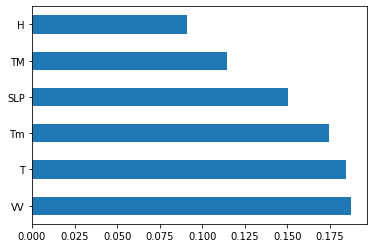

In [18]:
fea_imp.nlargest(6).plot(kind='barh')

# Performing Linear Regression on the model

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
regressor.coef_

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [22]:
regressor.intercept_

448.11616967588975

In [23]:
regressor.score(X_train,y_train)

0.551516808175875

In [24]:
regressor.score(X_test,y_test)

0.48525331308567876

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [26]:
score

array([0.51616617, 0.43816894, 0.50733957, 0.4861091 , 0.40750087])

In [27]:
score.mean()

0.4710569304807394

In [28]:
pd.DataFrame(regressor.coef_,columns=['Coeff'])

,Coeff
0,-2.690908
1,0.462200
2,-3.867052
3,-0.044949
4,-1.211936
5,-40.114908
6,-2.535633
7,0.561482


In [29]:
pred=regressor.predict(X_test)

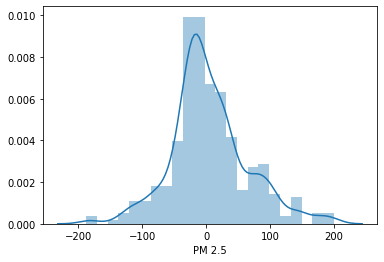

In [30]:
sns.distplot(y_test-pred)

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 44.83624126628639
MSE: 3687.5430309324192
RMSE: 60.725143317512384


# Decison Tree Regressor

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
dtree.score(X_train, y_train)

1.0

In [35]:
dtree.score(X_test, y_test)

0.6736014532060093

In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [37]:
score.mean()

0.5160880804793742

In [41]:
import sklearn
sklearn.__version__


'0.23.1'

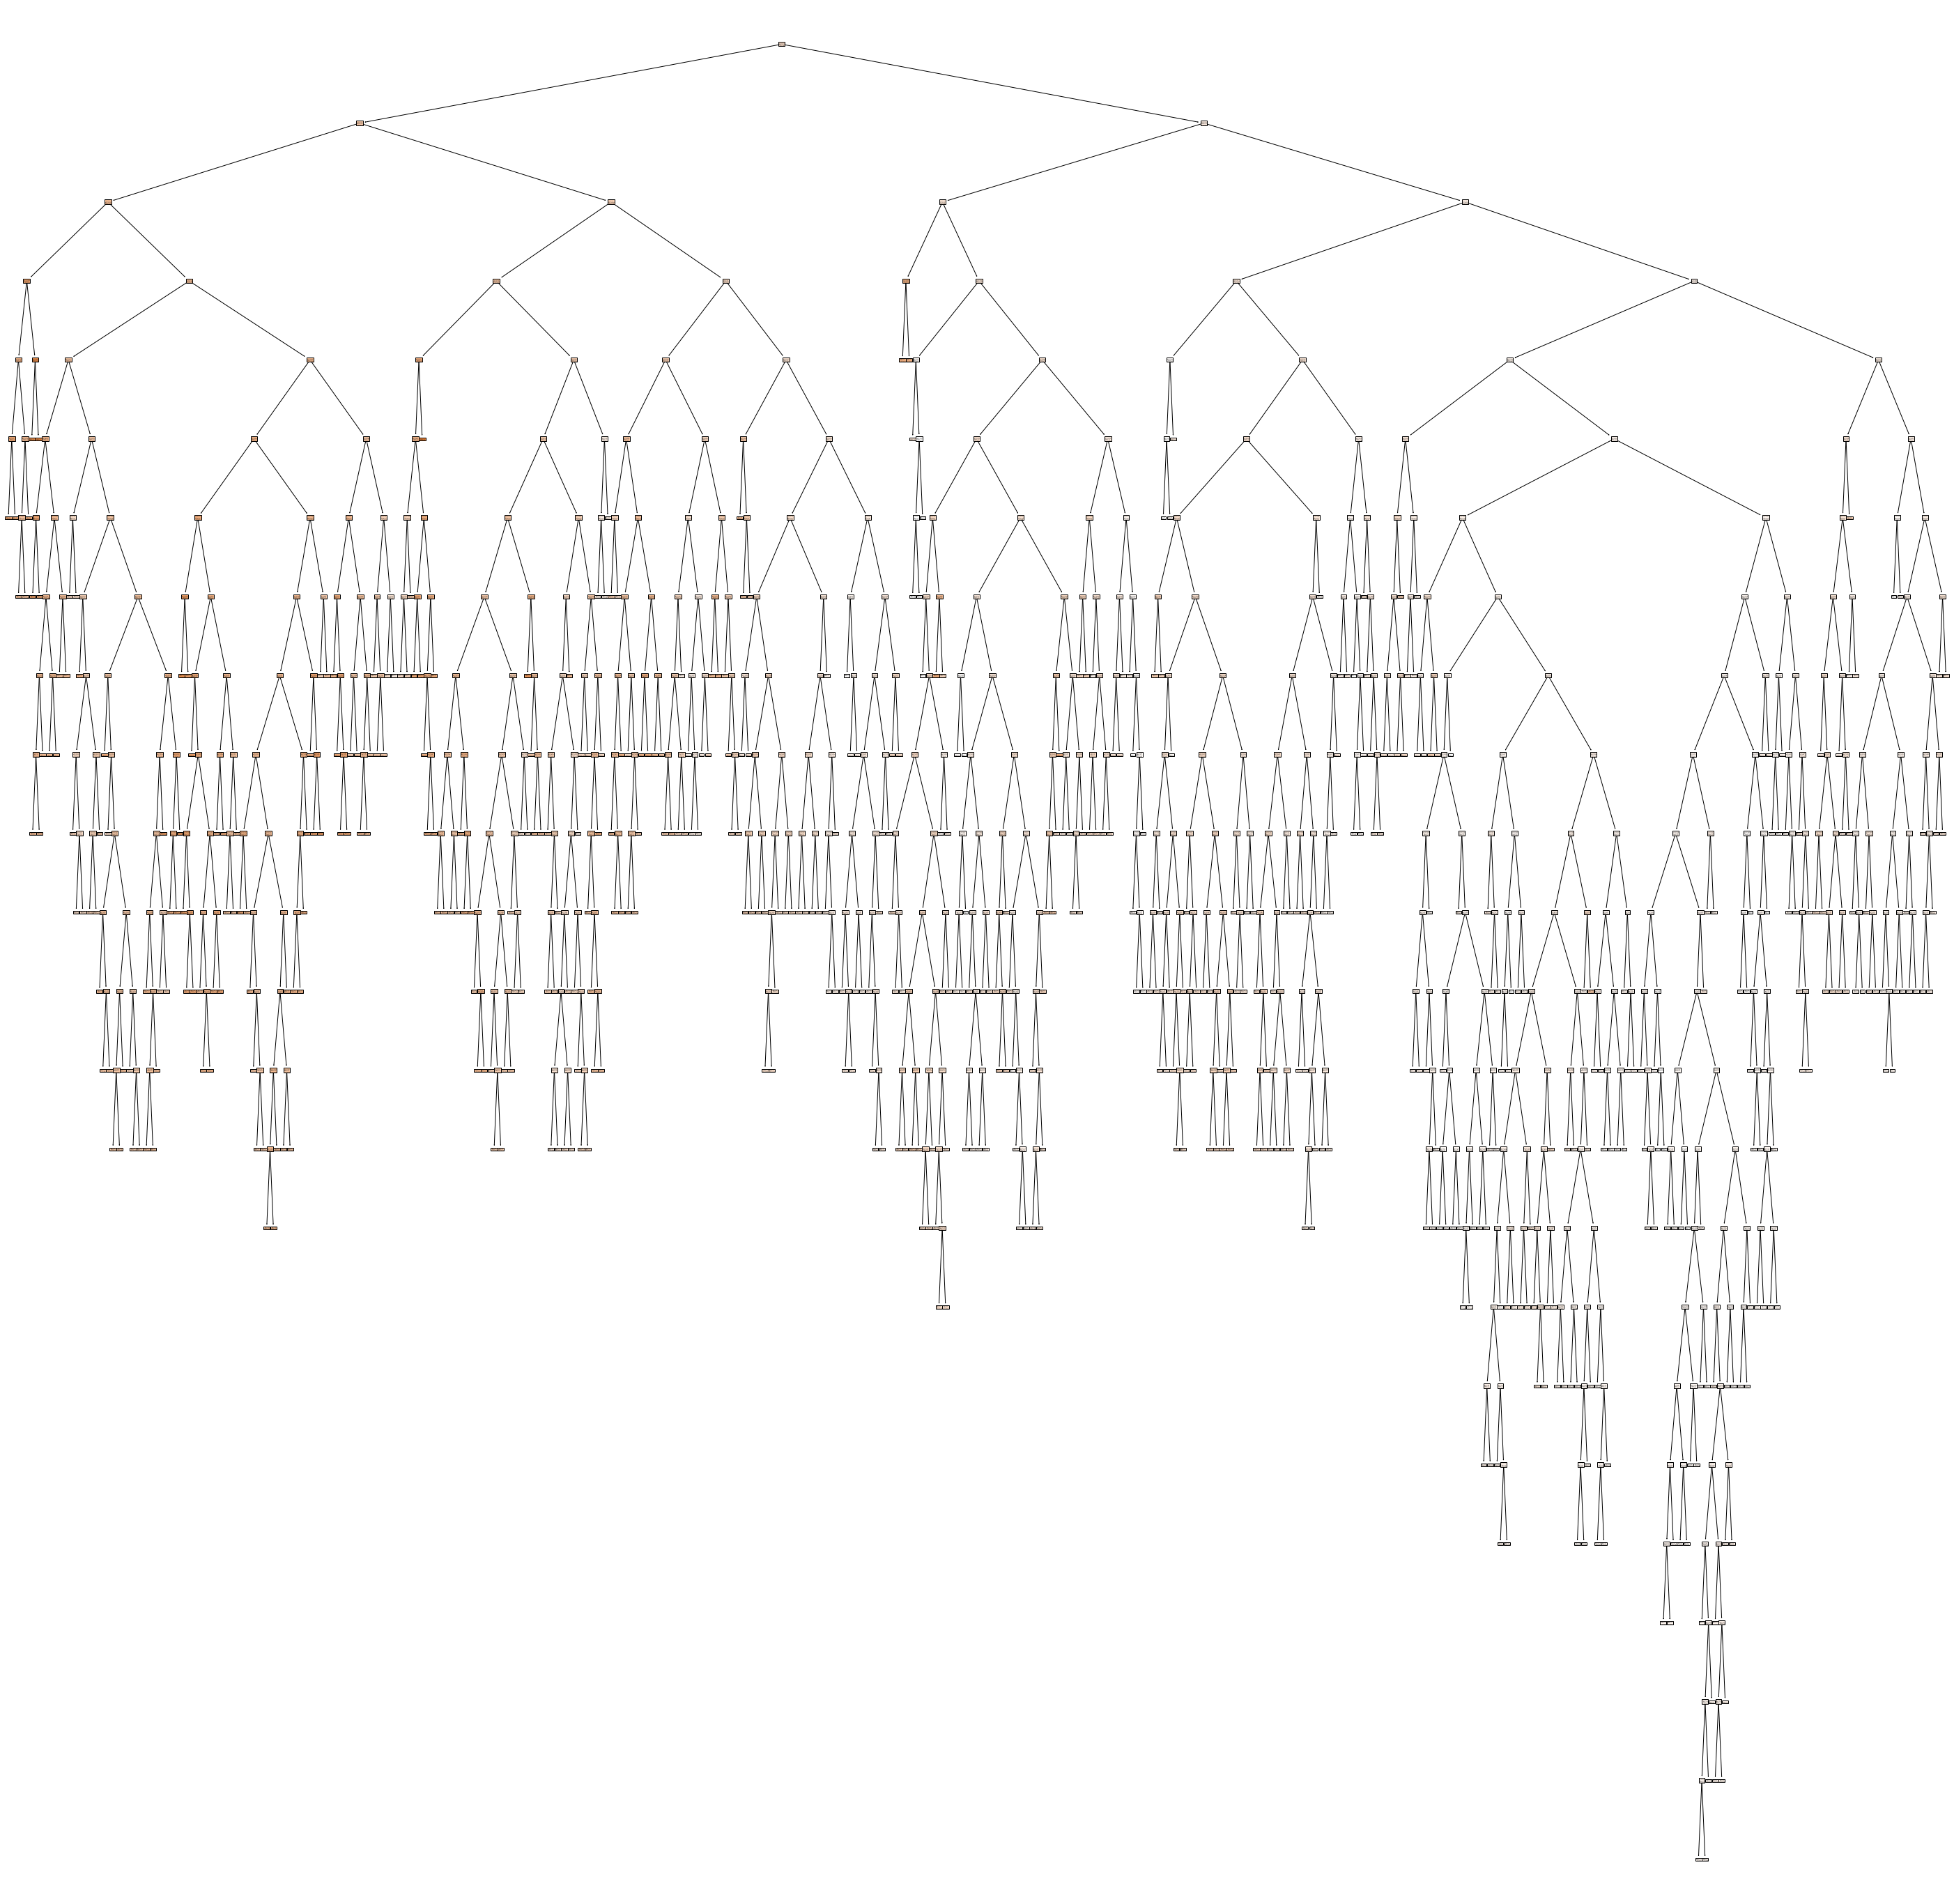

In [48]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(dtree,filled=True)
plt.show()

In [49]:
pred=dtree.predict(X_test)

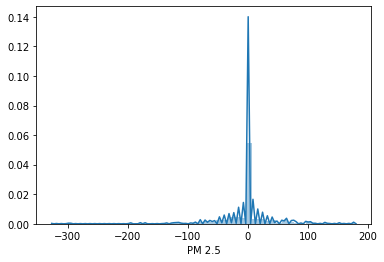

In [50]:
sns.distplot(y_test-pred)

In [51]:
#Hyper parameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters={'splitter':['best','random'],
           'max_depth':[3,4,6,8,12,15,18],
           'min_samples_leaf':[1,2,3,4,5],
           'min_weight_fraction_leaf':[0.1,0.2,0.4,0.5,0.6],
           "max_features" : ["auto","log2","sqrt",None ],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70]},

In [61]:

random_search=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [64]:
random_search.fit(X,y) 

Fitting 10 folds for each of 11200 candidates, totalling 112000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5648 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 12816 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 22032 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 33296 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 46608 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 61968 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 79376 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 112000 out of 112000 | elapsed:  2.6min finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=({'max_depth': [3, 4, 6, 8, 12, 15, 18],
                          'max_features': ['auto', 'log2', 'sqrt', None],
                          'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_weight_fraction_leaf': [0.1, 0.2, 0.4, 0.5, 0.6],
                          'splitter': ['best', 'random']},),
             scoring='neg_mean_squared_error', verbose=3)

In [65]:
random_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [66]:
random_search.best_score_

-3131.6489619178874

In [68]:
pred=random_search.predict(X_test)

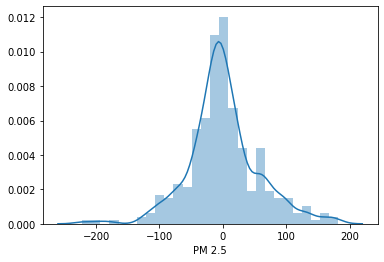

In [69]:
sns.distplot(y_test-pred)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 40.14163092473942
MSE: 3171.808145980198
RMSE: 56.31880810155874


In [71]:
import pickle

file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)